# Import Libabry

In [1]:
# import relevant libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Data Preprocessing

In [19]:
import os
print(os.path.exists('Skripsi/Kelulusan Train.xls'))

False


## Load the data

In [51]:
# Load the dataset
file_path = r'C:\Users\mauri\Skripsi\Kelulusan Train.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset and its basic info to understand its structure
data

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [53]:
data.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


In [55]:
print(data.columns)

Index(['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH',
       'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8',
       'IPK ', 'STATUS KELULUSAN'],
      dtype='object')


In [57]:
data['IPK ']

0      3.07
1      3.17
2      3.54
3      3.41
4      3.09
       ... 
374    0.99
375    2.97
376    3.03
377    3.16
378    2.16
Name: IPK , Length: 379, dtype: float64

In [59]:
# Delete columns NAMA, UMUR, IPS 6, IPS 7, IPS 8, IPK

data = data.drop(['NAMA', 'UMUR', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK '], axis=1)

In [61]:
data

,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,STATUS KELULUSAN
0,PEREMPUAN,BEKERJA,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,TERLAMBAT
1,PEREMPUAN,MAHASISWA,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,TERLAMBAT
2,PEREMPUAN,BEKERJA,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,TERLAMBAT
3,PEREMPUAN,MAHASISWA,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,TERLAMBAT
4,PEREMPUAN,BEKERJA,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,TERLAMBAT
...,...,...,...,...,...,...,...,...,...
374,LAKI - LAKI,MAHASISWA,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,TEPAT
375,PEREMPUAN,BEKERJA,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,TEPAT
376,PEREMPUAN,MAHASISWA,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,TEPAT
377,PEREMPUAN,MAHASISWA,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,TEPAT


## Handle missing values

In [64]:
# check missing value
data.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
STATUS KELULUSAN    0
dtype: int64

In [66]:
# Check duplicate

data.duplicated().sum()

1

In [68]:
# Tampilkan data-data yang duplikat

data[data.duplicated()]

,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,STATUS KELULUSAN
335,LAKI - LAKI,MAHASISWA,BELUM MENIKAH,2.57,3.02,3.13,3.25,3.29,TEPAT


In [70]:
# Hapus data duplikat
data = data.drop_duplicates()

# cek duplikasi pada data
data.duplicated().sum()

0

In [72]:
# check info

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 378
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JENIS KELAMIN     378 non-null    object 
 1   STATUS MAHASISWA  378 non-null    object 
 2   STATUS NIKAH      378 non-null    object 
 3   IPS 1             378 non-null    float64
 4   IPS 2             378 non-null    float64
 5   IPS 3             378 non-null    float64
 6   IPS 4             378 non-null    float64
 7   IPS 5             378 non-null    float64
 8   STATUS KELULUSAN  378 non-null    object 
dtypes: float64(5), object(4)
memory usage: 29.5+ KB


# Data Exploration

In [75]:
# Show data
data

,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,STATUS KELULUSAN
0,PEREMPUAN,BEKERJA,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,TERLAMBAT
1,PEREMPUAN,MAHASISWA,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,TERLAMBAT
2,PEREMPUAN,BEKERJA,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,TERLAMBAT
3,PEREMPUAN,MAHASISWA,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,TERLAMBAT
4,PEREMPUAN,BEKERJA,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,TERLAMBAT
...,...,...,...,...,...,...,...,...,...
374,LAKI - LAKI,MAHASISWA,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,TEPAT
375,PEREMPUAN,BEKERJA,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,TEPAT
376,PEREMPUAN,MAHASISWA,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,TEPAT
377,PEREMPUAN,MAHASISWA,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,TEPAT


In [77]:
# value of Jenis Kelamin

data['JENIS KELAMIN'].value_counts()

JENIS KELAMIN
LAKI - LAKI    233
PEREMPUAN      145
Name: count, dtype: int64

In [79]:
# value of Status Mahasiswa

data['STATUS MAHASISWA'].value_counts()

STATUS MAHASISWA
MAHASISWA    245
BEKERJA      133
Name: count, dtype: int64

In [81]:
# value of Status Kelulusan

data['STATUS KELULUSAN'].value_counts()

STATUS KELULUSAN
TEPAT        215
TERLAMBAT    163
Name: count, dtype: int64

# Label Encoding

In [84]:
# Label Encoding for categorical features

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

C:\Users\mauri\AppData\Local\Temp\ipykernel_7164\1514015607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
C:\Users\mauri\AppData\Local\Temp\ipykernel_7164\1514015607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
C:\Users\mauri\AppData\Local\Temp\ipykernel_7164\1514015607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [86]:
data

,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,STATUS KELULUSAN
0,1,0,0,2.76,2.80,3.20,3.17,2.98,1
1,1,1,0,3.00,3.30,3.14,3.14,2.84,1
2,1,0,0,3.50,3.30,3.70,3.29,3.53,1
3,1,1,0,3.17,3.41,3.61,3.36,3.48,1
4,1,0,0,2.90,2.89,3.30,2.85,2.98,1
...,...,...,...,...,...,...,...,...,...
374,0,1,0,1.98,2.50,2.14,2.77,2.61,0
375,1,0,0,2.74,2.75,2.55,3.00,2.98,0
376,1,1,0,2.74,2.75,2.55,3.00,2.98,0
377,1,1,0,3.02,2.94,3.25,2.87,3.00,0


In [88]:
# value of Jenis Kelamin

data['JENIS KELAMIN'].value_counts()

JENIS KELAMIN
0    233
1    145
Name: count, dtype: int64

In [90]:
# value of Status Mahasiswa

data['STATUS MAHASISWA'].value_counts()

STATUS MAHASISWA
1    245
0    133
Name: count, dtype: int64

In [92]:
# value of Status Kelulusan

data['STATUS KELULUSAN'].value_counts()

STATUS KELULUSAN
0    215
1    163
Name: count, dtype: int64

# Create Machine Learning Model

## Split the data

In [96]:
# Define features (X) and target (y)
input_features = ['JENIS KELAMIN',
                  'STATUS MAHASISWA',
                  'STATUS NIKAH',
                  'IPS 1',
                  'IPS 2',
                  'IPS 3',
                  'IPS 4',
                  'IPS 5']
X = data[input_features]
y = data['STATUS KELULUSAN']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((302, 8), (76, 8), (302,), (76,))

In [98]:
X_train

,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5
137,0,0,0,2.86,3.36,3.55,3.38,3.38
101,0,1,0,2.71,3.41,2.73,2.45,2.34
314,0,1,0,2.50,2.08,2.25,2.27,2.21
300,0,1,0,2.48,2.32,2.18,2.36,2.32
223,1,1,0,3.79,3.13,3.69,3.09,3.19
...,...,...,...,...,...,...,...,...
71,1,0,1,2.57,3.16,3.06,2.88,2.30
106,1,1,0,3.64,3.96,3.69,3.83,3.81
270,1,1,0,3.19,2.90,2.59,2.77,3.09
349,0,1,0,3.26,3.06,3.27,3.52,2.77


In [100]:
X_test

,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5
287,0,1,0,2.55,2.55,2.59,3.09,2.79
329,0,1,0,3.15,2.67,2.68,2.36,2.25
323,1,1,0,3.57,3.23,2.38,3.59,3.56
145,1,1,0,3.33,2.48,3.73,3.52,3.44
55,0,0,0,2.14,1.55,2.03,2.27,1.70
...,...,...,...,...,...,...,...,...
227,0,0,0,2.86,2.75,3.48,2.83,2.91
182,1,0,0,2.93,2.69,3.39,2.79,2.66
316,1,1,0,2.17,2.66,2.86,2.86,2.64
110,1,0,0,3.10,2.38,2.41,2.27,2.57


In [102]:
y_train

137    1
101    1
314    0
300    0
223    0
      ..
71     1
106    0
270    0
349    0
102    0
Name: STATUS KELULUSAN, Length: 302, dtype: int32

In [104]:
# Show value of y_train

y_train.value_counts()

STATUS KELULUSAN
0    180
1    122
Name: count, dtype: int64

In [106]:
y_test

287    0
329    1
323    0
145    0
55     1
      ..
227    1
182    1
316    0
110    1
305    0
Name: STATUS KELULUSAN, Length: 76, dtype: int32

In [108]:
# Show value of y_train

y_test.value_counts()

STATUS KELULUSAN
1    41
0    35
Name: count, dtype: int64

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

In [111]:
# Train the Random Forest model with the best parameters
rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=5,
    max_features='log2',
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=500,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Test the model
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy after Hyperparameter Tuning: {accuracy}')

Model Accuracy after Hyperparameter Tuning: 0.881578947368421


In [113]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[34  1]
 [ 8 33]]


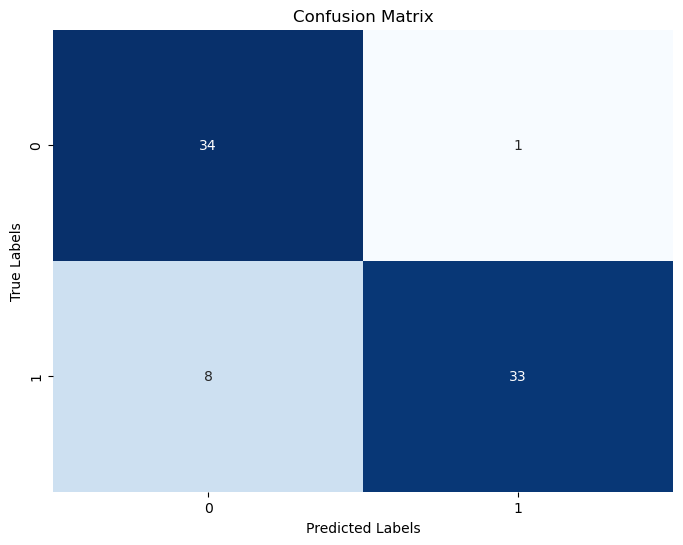

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

            Feature  Importance
2      STATUS NIKAH    0.004996
0     JENIS KELAMIN    0.006479
4             IPS 2    0.057035
3             IPS 1    0.061810
5             IPS 3    0.069220
6             IPS 4    0.094826
7             IPS 5    0.133935
1  STATUS MAHASISWA    0.571698


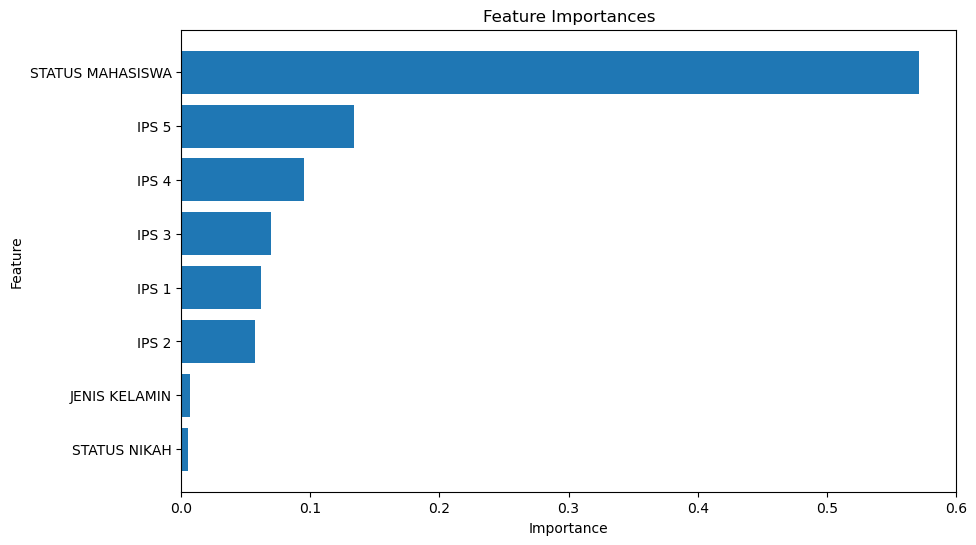

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': input_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [119]:
# prompt: Tampilkan actual value dan hasil predictiom

import pandas as pd
# Create a dataframe to display actual and predicted values side-by-side
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the dataframe
print(result_df.to_string())

     Actual  Predicted
287       0          0
329       1          1
323       0          0
145       0          0
55        1          1
93        0          0
341       0          0
82        1          0
366       0          0
148       1          1
292       0          0
208       0          0
33        0          0
90        1          1
367       0          0
361       0          0
253       0          0
113       0          0
339       0          0
108       1          0
15        1          0
141       1          1
173       1          1
0         1          1
76        1          1
192       1          0
25        1          1
362       0          0
9         1          1
116       1          0
229       1          1
140       1          1
210       1          1
42        1          1
78        1          1
39        1          1
46        1          1
375       0          1
104       1          1
124       0          0
232       0          0
22        1          0
31        1

In [121]:
# prompt: Count how many are correct

# Count correct predictions
correct_predictions = (result_df['Actual'] == result_df['Predicted']).sum()
print("Number of correct predictions:", correct_predictions)

Number of correct predictions: 67


In [123]:
# prompt: Save the model!

# Save the trained model to a file
filename = 'trained_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))